# Jupyter Notebook to Run Selective Search for an Image 
(This can be automated to loop through various images)

### Reading and plotting an image

Populating the interactive namespace from numpy and matplotlib


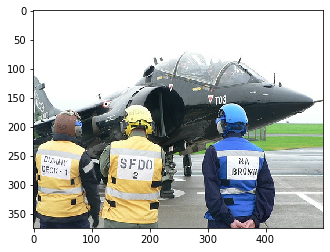

In [1]:
import Utils
img = Utils.readImage("/Users/nishatiwari/PycharmProjects/OpenCV/HW2_Data/JPEGImages/000480.jpg")
%pylab inline
from matplotlib import pyplot as plt
plt.imshow(img)

### Calling Edge Detection for the image

In [2]:
import EdgeDetectionUtils
model_path="/Users/nishatiwari/PycharmProjects/OpenCV/model.yml.gz"
alpha=0.8  #default value in the library is 0.65
beta=0.8 #default value in the library is 0.75
boxes, scores=EdgeDetectionUtils.applyEdgeDetection(img, model_path, alpha, beta)

### Plotting the top 100 bounding boxes from Edge Detection

Populating the interactive namespace from numpy and matplotlib


/anaconda3/envs/cv/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['beta']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


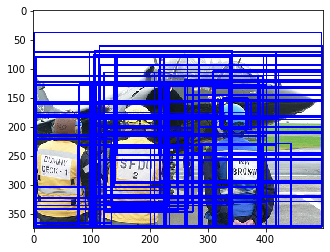

In [3]:
img_with_bboxes=Utils.drawBoxesInImagePredBox(img, 100, boxes,(0,0,255))
%pylab inline
plt.imshow(img_with_bboxes)
plt.show()

### Parsing Annotations for the given image and plotting the ground truths on the image

Populating the interactive namespace from numpy and matplotlib


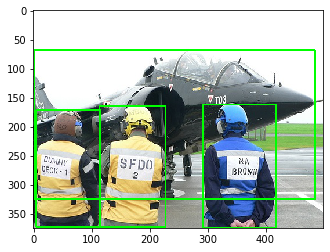

In [4]:
xmlPath='/Users/nishatiwari/PycharmProjects/OpenCV/HW2_Data/Annotations/000480.xml'
GTimageObjects=Utils.parseXMLAndFindObjects(xmlPath)
img_with_gt_bboxes=Utils.drawBoxesInImage(img, len(GTimageObjects), GTimageObjects, (0,255,0))
%pylab inline
plt.imshow(img_with_gt_bboxes)
plt.show()

### Calculating IOU and plotting all the bounding boxes greater than the IOU threshold

Populating the interactive namespace from numpy and matplotlib


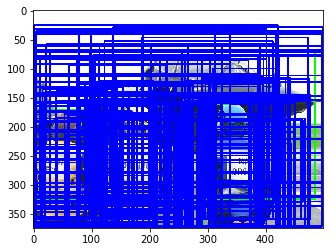

In [5]:
threshold=0.5
mabo, precision, recall, selectedBoxes, bestOverlapBoxes =Utils.calculateIOU( boxes, GTimageObjects, threshold)
img_with_selectedBboxes=Utils.drawBoxesInImagePredBox(img_with_gt_bboxes, len(selectedBoxes), selectedBoxes, (0,0,255))
%pylab inline
plt.imshow(img_with_selectedBboxes)
plt.show()

### Plotting the best overlapped boxes from boxes with IOU>threshold

Populating the interactive namespace from numpy and matplotlib


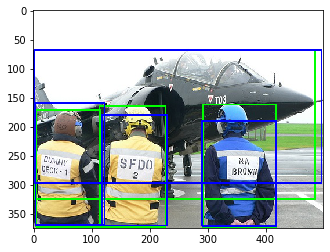

In [6]:
img_with_selectedBboxes=Utils.drawBoxesInImagePredBox(img_with_gt_bboxes, len(bestOverlapBoxes), bestOverlapBoxes, (0,0,255))
%pylab inline
plt.imshow(img_with_selectedBboxes)
plt.show()

### Printing Mean Average Best Overlap (MABO), Precision, Recall, and No. of Bounding Boxes found

In [7]:
print("MABO::",mabo, "PRECISION::", precision,"RECALL::", recall, "No. of Bounding Boxes Found::", len(selectedBoxes))

MABO:: 0.8576803136081508 PRECISION:: 0.04 RECALL:: 100.0 No. of Bounding Boxes Found:: 262
